In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
covid19 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases.csv')

In [9]:
covid19

,province_state,fips,date,confirmed,deaths
0,Vermont,50001.0,2020-05-07,61,2.0
1,Maine,23001.0,2020-05-07,74,2.0
2,Arizona,4001.0,2020-05-07,630,7.0
3,Massachusetts,25001.0,2020-05-07,1021,57.0
4,Utah,NaN,2020-05-07,64,1.0
...,...,...,...,...,...
1562398,South Carolina,45005.0,2020-04-17,6,0.0
1562399,South Carolina,45005.0,2020-04-22,6,0.0
1562400,South Carolina,45005.0,2020-04-19,6,0.0
1562401,South Carolina,45081.0,2020-04-13,6,0.0


In [10]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562403 entries, 0 to 1562402
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   province_state  1562403 non-null  object 
 1   fips            1555155 non-null  float64
 2   date            1562403 non-null  object 
 3   confirmed       1562403 non-null  int64  
 4   deaths          1562373 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 59.6+ MB


In [11]:
covid19.dropna(subset=['fips'], inplace=True)
covid19.date = pd.to_datetime(covid19.date, format='%Y-%m-%d')
covid19.fips = covid19.fips.astype(int)
covid19.columns = ['state', 'county', 'date', 'confirmed', 'deaths']

In [12]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555155 entries, 0 to 1562402
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   state      1555155 non-null  object        
 1   county     1555155 non-null  int64         
 2   date       1555155 non-null  datetime64[ns]
 3   confirmed  1555155 non-null  int64         
 4   deaths     1555155 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 71.2+ MB


In [13]:
covid19.head(2)

,state,county,date,confirmed,deaths
0,Vermont,50001,2020-05-07,61,2.0
1,Maine,23001,2020-05-07,74,2.0


In [14]:
covid19.describe()

,county,confirmed,deaths
count,1.555155e+06,1.555155e+06,1.555155e+06
mean,3.214043e+04,5.021643e+03,9.958312e+01
std,1.778210e+04,2.361218e+04,5.112078e+02
min,6.600000e+01,0.000000e+00,0.000000e+00
25%,1.903100e+04,1.180000e+02,1.000000e+00
50%,3.004100e+04,7.690000e+02,1.400000e+01
75%,4.701300e+04,2.839000e+03,5.500000e+01
max,9.999900e+04,1.276254e+06,2.460900e+04


In [15]:
covid19.date.min()

Timestamp('2020-03-22 00:00:00')

In [16]:
covid19.date.max()

Timestamp('2021-07-22 00:00:00')

In [20]:
covid_last_day = covid19[covid19.date == covid19.date.max()]
covid_last_day = covid_last_day.drop('date', axis=1)
covid_last_day.head(2)

,state,county,confirmed,deaths
48704,Arizona,4001,11650,437.0
48705,Arizona,4003,12304,294.0


In [27]:
bar_data = covid_last_day.groupby('state')[['confirmed']].sum().sort_values('confirmed', ascending=False).reset_index()
bar_data

,state,confirmed
0,California,3893526
1,Texas,3064743
2,Florida,2450344
3,New York,2131535
4,Illinois,1406459
5,Pennsylvania,1223026
6,Georgia,1155208
7,Ohio,1120120
8,New Jersey,1031346
9,North Carolina,1029931


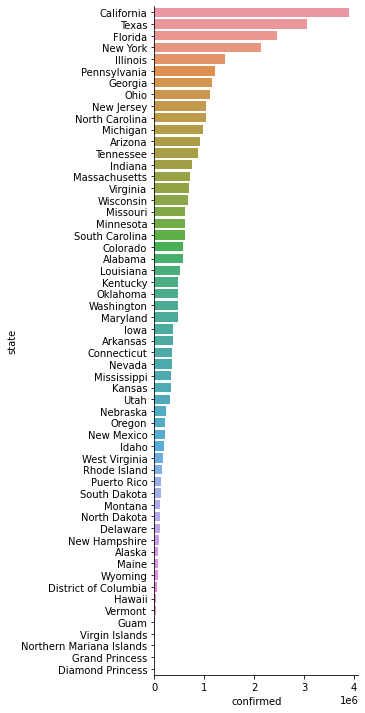

In [29]:
sns.catplot(data=bar_data, x='confirmed', y='state', kind='bar', 
            height=10, aspect=0.5);

In [31]:
covid19.date.max()

Timestamp('2021-07-22 00:00:00')

In [33]:
from datetime import timedelta
date_last_week = covid19.date.max() - timedelta(days=7)
covid_one_week_ago = covid19[covid19.date == date_last_week]
covid_one_week_ago = covid_one_week_ago.drop('date', axis=1)
covid_one_week_ago.head(2)

,state,county,confirmed,deaths
59951,Arizona,4001,11568,437.0
59952,Arizona,4003,12265,293.0


In [36]:
merged_df = pd.merge(covid_last_day, covid_one_week_ago, on=['state', 'county'], how='left', suffixes=('_0', '_7'))
merged_df.head(5)

,state,county,confirmed_0,deaths_0,confirmed_7,deaths_7
0,Arizona,4001,11650,437.0,11568,437.0
1,Arizona,4003,12304,294.0,12265,293.0
2,Arizona,4005,18306,331.0,18223,331.0
3,Arizona,4007,7248,231.0,7174,231.0
4,Arizona,4009,5636,86.0,5614,85.0


In [39]:
merged_df['confirmed'] = merged_df.confirmed_0 - merged_df.confirmed_7
merged_df['deaths'] = merged_df.deaths_0 - merged_df.deaths_7
merged_df.head(5)

,state,county,confirmed_0,deaths_0,confirmed_7,deaths_7,confirmed,deaths
0,Arizona,4001,11650,437.0,11568,437.0,82,0.0
1,Arizona,4003,12304,294.0,12265,293.0,39,1.0
2,Arizona,4005,18306,331.0,18223,331.0,83,0.0
3,Arizona,4007,7248,231.0,7174,231.0,74,0.0
4,Arizona,4009,5636,86.0,5614,85.0,22,1.0


In [40]:
covid_last_7_days = merged_df[['state', 'county', 'confirmed', 'deaths']]
covid_last_7_days.head(2)

,state,county,confirmed,deaths
0,Arizona,4001,82,0.0
1,Arizona,4003,39,1.0


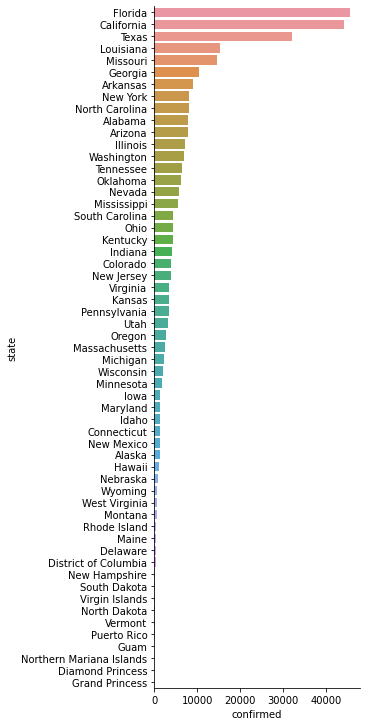

In [46]:
covid_last_7_days_state = covid_last_7_days.groupby('state')[['confirmed', 'deaths']].sum().sort_values('confirmed', ascending=False).reset_index()
sns.catplot(data=covid_last_7_days_state, x='confirmed', y='state', kind='bar', 
            height=10, aspect=0.5);

In [47]:
us_pop = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US_Population_By_State_2019.csv')
us_pop.head()

,STATE,POPULATION
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [49]:
df_7 = covid_last_7_days_state.merge(us_pop, how='right', left_on='state', right_on='STATE')
df_7.drop('STATE', axis=1, inplace=True)
df_7.head(2)

,state,confirmed,deaths,POPULATION
0,Alabama,7932,29.0,4903185
1,Alaska,1221,1.0,731545


In [51]:
df_7['confirmed_per_m'] = df_7['confirmed'] / df_7['POPULATION'] * 1000000
df_7['deaths_per_m'] = df_7['deaths'] / df_7['POPULATION'] * 1000000
df_7.sort_values('confirmed_per_m', ascending=False, inplace=True)
df_7.head(2)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m
18,Louisiana,15376,68.0,4648794,3307.524489,14.627450
3,Arkansas,9088,54.0,3017804,3011.461314,17.893806


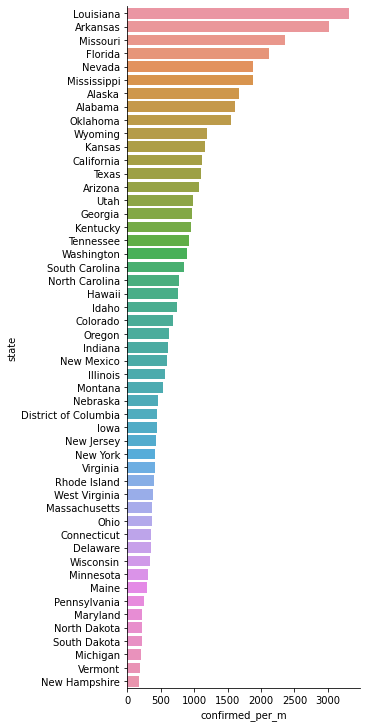

In [52]:
sns.catplot(data=df_7, x='confirmed_per_m', y='state', kind='bar', 
            height=10, aspect=0.5);

In [53]:
us_vax = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/us_state_vaccinations.csv')
us_vax.head(5)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [54]:
us_vax.date.max()

'2021-07-23'

In [55]:
us_vax = us_vax[us_vax.date == us_vax.date.max()]
us_vax = us_vax[['location', 'people_fully_vaccinated_per_hundred']]
us_vax.columns = ['state', 'vax_rate']
us_vax.head(2)

,state,vax_rate
192,Alabama,33.92
385,Alaska,45.17


In [56]:
df_7 = df_7.merge(us_vax)
df_7.head()

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate
0,Louisiana,15376,68.0,4648794,3307.524489,14.627450,36.43
1,Arkansas,9088,54.0,3017804,3011.461314,17.893806,35.70
2,Missouri,14518,68.0,6137428,2365.485998,11.079560,40.59
3,Florida,45449,231.0,21477737,2116.098172,10.755323,48.15
4,Nevada,5810,45.0,3080156,1886.268098,14.609650,43.72


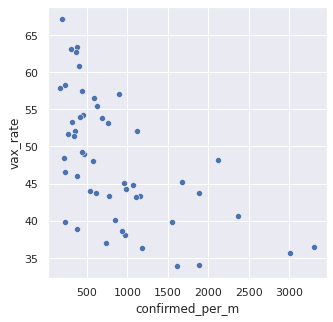

In [57]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data=df_7, x='confirmed_per_m', y='vax_rate');

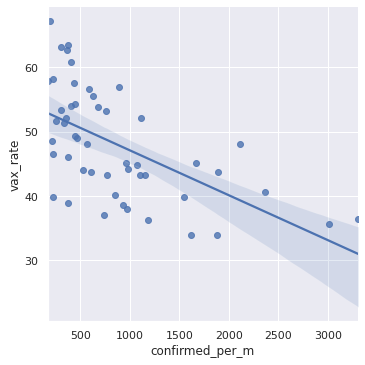

In [58]:
sns.lmplot(x="confirmed_per_m", y="vax_rate", data=df_7);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


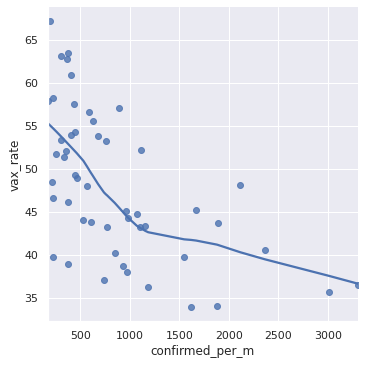

In [59]:
sns.lmplot(x="confirmed_per_m", y="vax_rate", data=df_7,
           lowess=True);

In [60]:
# Install and import the package
!pip install plotly_express -q
import plotly_express as px

In [61]:
fig = px.scatter(df_7, x="confirmed_per_m", y="vax_rate", color="state")
fig.show()

In [62]:
# Correlation
df_7['confirmed_per_m'].corr(df_7['vax_rate'])

-0.5864026947199409

In [63]:
abbrevs = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/state-abbrevs.csv')
abbrevs.head(1)

,state,abbreviation
0,Alabama,AL


In [64]:
df_7 = df_7.merge(abbrevs)
df_7.head(1)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate,abbreviation
0,Louisiana,15376,68.0,4648794,3307.524489,14.62745,36.43,LA


In [65]:
import plotly.express as px

px.scatter_geo(df_7, 
               locations='abbreviation', 
               locationmode='USA-states',
               color='confirmed_per_m', 
               size='vax_rate', 
               hover_name='state', 
               scope='usa'
               )

In [66]:
import plotly.express as px

px.choropleth(df_7, 
               locations='abbreviation', 
               locationmode='USA-states',
               color='confirmed_per_m', 
               hover_name='state', 
               scope='usa'
               )

# COVID-19 Mortality

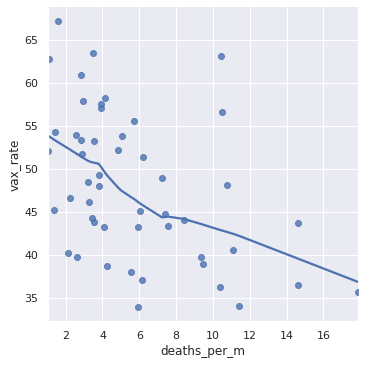

In [67]:
sns.lmplot(x="deaths_per_m", y="vax_rate", data=df_7,
           lowess=True);

In [68]:
# Correlation
df_7['deaths_per_m'].corr(df_7['vax_rate'])

-0.4578667173104185